In [2]:
"""
@author: Miao-Chin Yen
"""

import math
import statistics
import random
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [3]:

'''
    policy: optimal or naive
    S_0: asset initial price
    T: maturity time (year)
    timestep: each simulation consists of T/timestep steps
    gamma: cofficient of risk aversion
    sigma: volatility of asset price
    I_0: initial inventory
    k, c: cofficients related to hit/lift rates 
    simulation_times: the number of simulation trace we'll run
'''

def market_making(policy, S_0, T, timestep, gamma, sigma, I_0, k, c, simulation_times):
        if policy == 'naive':
            optimal_result = market_making('optimal', S_0, T, timestep, gamma, sigma, I_0, k, c, simulation_times)
            delta_a = optimal_result[1][0]
            delta_b = optimal_result[1][1]
        PnL_trace = []
        inventory_trace = []
        OB_mid_price_trace = []
        bid_price_trace = []
        ask_price_trace = []
        lift_trace = []
        hit_trace =[]
        PnL_hist = []
        inventory_hist = []
        hits_hist = []
        lifts_hist = []
        delta_a_hist = []
        delta_b_hist = []
        steps = int(T / timestep)
        for i in range(simulation_times):
            PnL = 0
            inventory = I_0
            OB_mid_price  = S_0
            hits =  0
            lifts = 0
            for t in range(steps):
                if policy  == 'optimal':
                    Q_b = OB_mid_price - (inventory + 0.5) * gamma * (steps - t) / steps * sigma **2 
                    Q_a = OB_mid_price - (inventory - 0.5) * gamma * (steps - t) / steps * sigma **2
                    bid_price = Q_b - (math.log(1 + gamma/k)) / gamma
                    ask_price = Q_a + (math.log(1 + gamma/k)) / gamma
                    delta_a =  Q_a - OB_mid_price + (math.log(1 + gamma/k)) / gamma
                    delta_b = OB_mid_price - Q_b + (math.log(1 + gamma/k)) / gamma
                    delta_a_hist.append(delta_a)
                    delta_b_hist.append(delta_b)
                elif policy == 'naive':
                    bid_price = OB_mid_price - delta_b
                    ask_price = OB_mid_price + delta_a
                if i == 0:
                    OB_mid_price_trace.append(OB_mid_price)
                    inventory_trace.append(inventory)
                    PnL_trace.append(PnL)
                    bid_price_trace.append(bid_price)
                    ask_price_trace.append(ask_price)
                    hit_trace.append(hits)
                    lift_trace.append(lifts)
                if c * math.exp(-k * delta_a) * timestep >= 1:
                    sample_a = bernoulli.rvs(0.999, size=1)[0]
                else:  
                    sample_a = bernoulli.rvs(c * math.exp(-k * delta_a) * timestep, size=1)[0]
                if sample_a == 1:
                    inventory -= 1
                    PnL += ask_price
                    lifts += 1
                if c * math.exp(-k * delta_b) * timestep >= 1:
                    sample_b = bernoulli.rvs(0.999, size=1)[0]
                else:
                    sample_b = bernoulli.rvs(c * math.exp(-k * delta_b) * timestep, size=1)[0]
                if sample_b == 1:
                    inventory += 1
                    PnL -= bid_price
                    hits += 1
                if bernoulli.rvs(0.5, size=1) == 1:
                    OB_mid_price += sigma * math.sqrt(timestep)
                else:
                    OB_mid_price -= sigma * math.sqrt(timestep)
            PnL_hist.append(PnL)
            inventory_hist.append(inventory)
            hits_hist.append(hits)
            lifts_hist.append(lifts)
        single_trace = (
                            PnL_trace,
                            inventory_trace,
                            OB_mid_price_trace,
                            bid_price_trace,
                            ask_price_trace,
                            hit_trace,
                            lift_trace
                        )
        if policy == 'optimal':
            stat = (
                    statistics.mean(delta_a_hist),
                    statistics.mean(delta_b_hist),
                    PnL_hist,
                    inventory_hist,
                    hits_hist,
                    lifts_hist
                    )
            return (single_trace, stat)
        elif policy == 'naive':
            stat = (
                    PnL_hist,
                    inventory_hist,
                    hits_hist,
                    lifts_hist
                    )
            return (optimal_result, single_trace, stat)
                    

0.01
1.349008543733702 Average Spread
58.21 Naive PnL Mean
869.14 Naive PnL SD


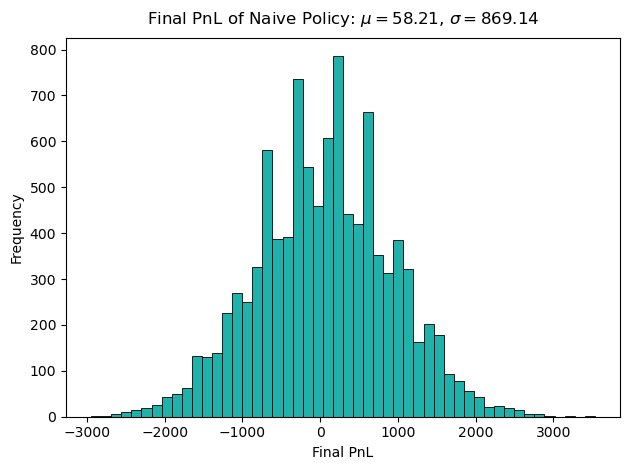

69.6 Optimal PnL Mean
528.54 Optimal PnL SD


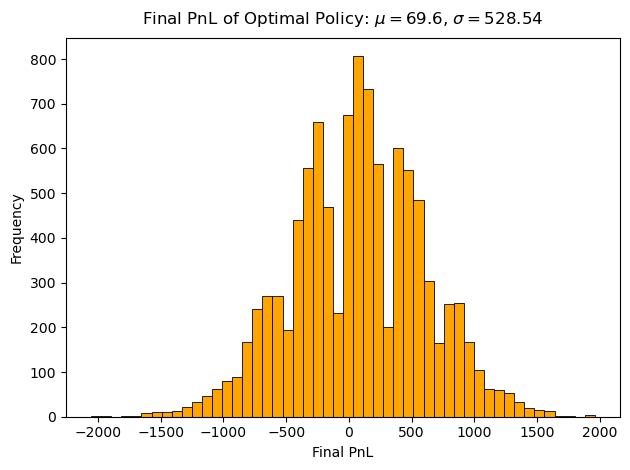

0.1 Naive Inventory Mean
8.69 Naive Inventory SD


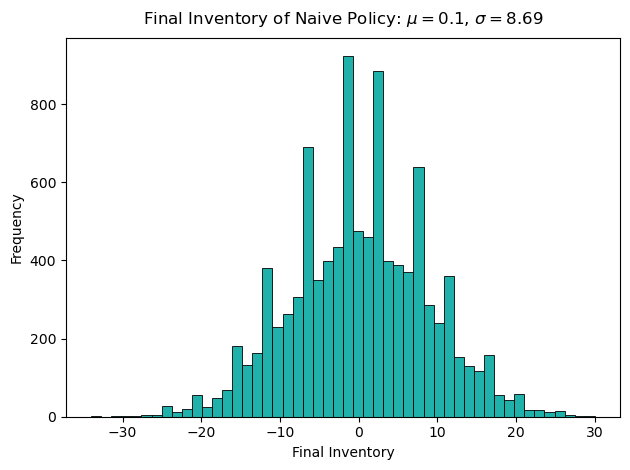

-0.01 Optimal Inventory Mean
5.28 Optimal Inventory SD


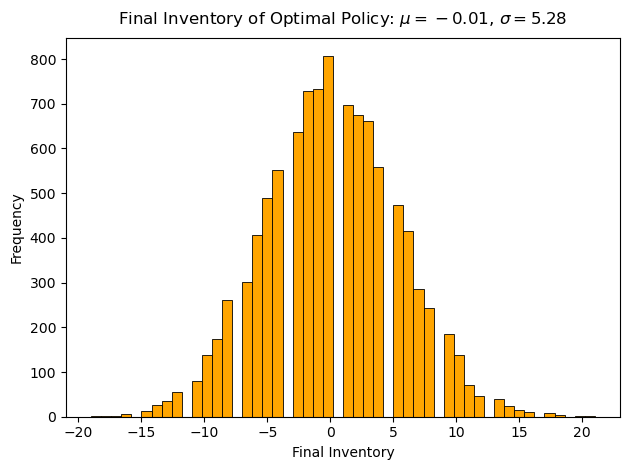

50.97 Naive Hits Mean
6.13 Naive Hits SD


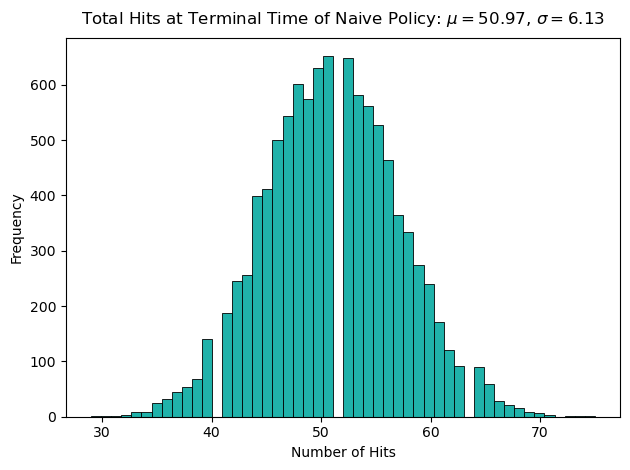

51.08 Optimal Hits Mean
5.05 Optimal Hits SD


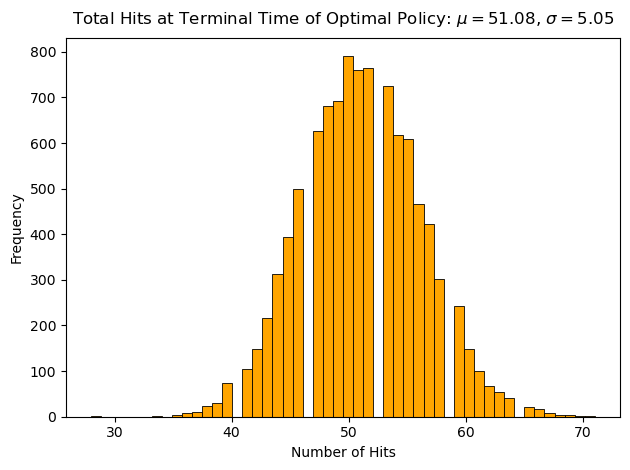

50.87 Naive Lifts Mean
6.12 Naive Lifts SD


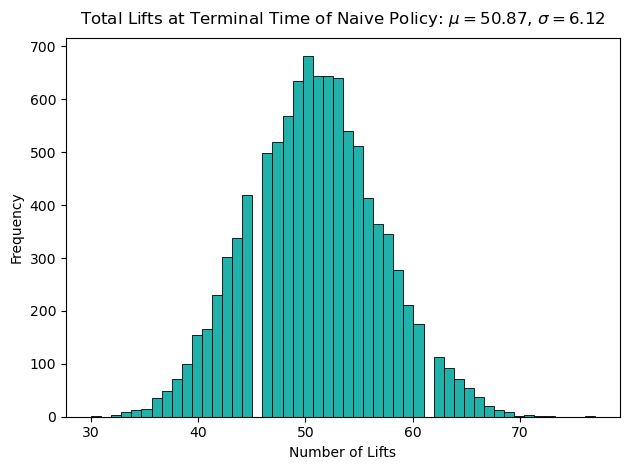

51.09 Optimal Lifts Mean
5.04 Optimal Lifts SD


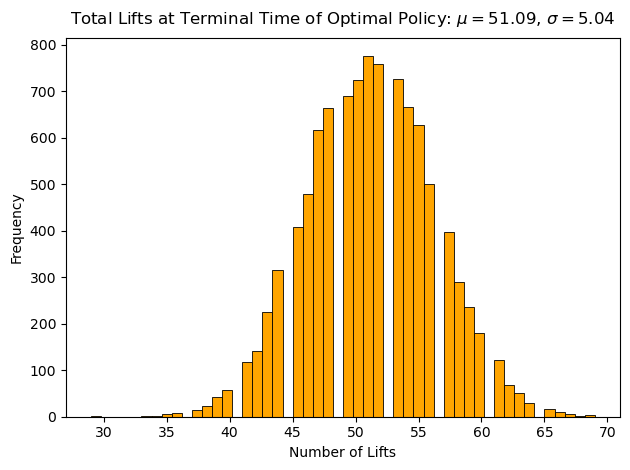

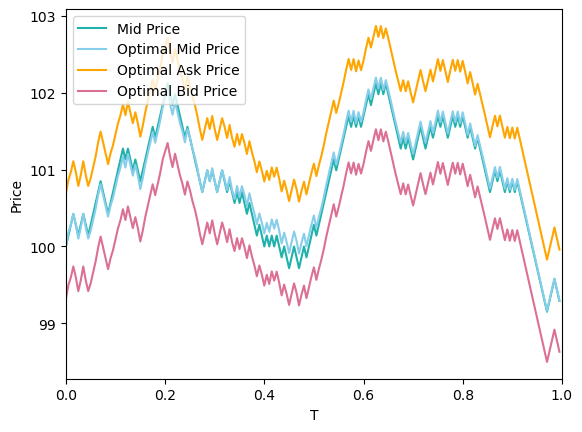

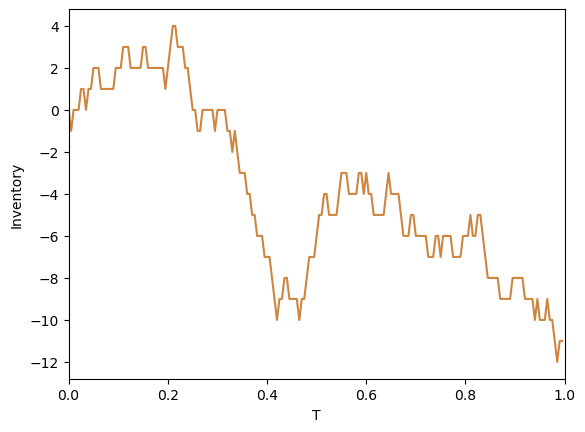

In [4]:
S_0 = 100
T = 1
timestep = 0.005
gamma = 0.01
sigma = 2
I_0 = 0
k = 1.5 
c = 140
simulation_times = 10000

x_axis = [i / int(T / timestep) for i in range(int(T/timestep))]

naive_optimal = market_making('naive',S_0, T, timestep, gamma, sigma, I_0, k, c, simulation_times)
naive_result_single_trace = naive_optimal[1]
naive_result_stat = naive_optimal[2]
optimal_result_single_trace = naive_optimal[0][0]
optimal_result_stat = naive_optimal[0][1]


average_spread = optimal_result_stat[0] + optimal_result_stat[1]
print(gamma)
print(average_spread, 'Average Spread')


naive_PnL = naive_result_stat[0]
naive_inventory = naive_result_stat[1]
naive_hits = naive_result_stat[2]
naive_lifts = naive_result_stat[3]
optimal_PnL = optimal_result_stat[2]
optimal_inventory = optimal_result_stat[3]
optimal_hits = optimal_result_stat[4]
optimal_lifts = optimal_result_stat[5]


''' Naive PnL'''
mu = round(statistics.mean(naive_PnL), 2)
sigma = round(statistics.stdev(naive_PnL), 2)

print(mu, 'Naive PnL Mean')
print(sigma, 'Naive PnL SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(naive_PnL, num_bins, density=False, color='lightseagreen',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Final PnL')
ax.set_ylabel('Frequency')
ax.set_title(rf'Final PnL of Naive Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()


''' Optimal PnL'''
mu = round(statistics.mean(optimal_PnL), 2)
sigma = round(statistics.stdev(optimal_PnL), 2)

print(mu, 'Optimal PnL Mean')
print(sigma, 'Optimal PnL SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(optimal_PnL, num_bins, density=False, color='orange',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Final PnL')
ax.set_ylabel('Frequency')
ax.set_title(rf'Final PnL of Optimal Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()



''' Naive Inventory'''
mu = round(statistics.mean(naive_inventory), 2)
sigma = round(statistics.stdev(naive_inventory), 2)

print(mu, 'Naive Inventory Mean')
print(sigma, 'Naive Inventory SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(naive_inventory, num_bins, density=False, color='lightseagreen',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Final Inventory')
ax.set_ylabel('Frequency')
ax.set_title(rf'Final Inventory of Naive Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()


''' Optimal Inventory'''
mu = round(statistics.mean(optimal_inventory), 2)
sigma = round(statistics.stdev(optimal_inventory), 2)

print(mu, 'Optimal Inventory Mean')
print(sigma, 'Optimal Inventory SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(optimal_inventory, num_bins, density=False, color='orange',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Final Inventory')
ax.set_ylabel('Frequency')
ax.set_title(rf'Final Inventory of Optimal Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()

''' Naive Hits'''
mu = round(statistics.mean(naive_hits), 2)
sigma = round(statistics.stdev(naive_hits), 2)

print(mu, 'Naive Hits Mean')
print(sigma, 'Naive Hits SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(naive_hits, num_bins, density=False, color='lightseagreen',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Number of Hits')
ax.set_ylabel('Frequency')
ax.set_title(rf'Total Hits at Terminal Time of Naive Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()


''' Optimal Hits'''
mu = round(statistics.mean(optimal_hits), 2)
sigma = round(statistics.stdev(optimal_hits), 2)

print(mu, 'Optimal Hits Mean')
print(sigma, 'Optimal Hits SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(optimal_hits, num_bins, density=False, color='orange',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Number of Hits')
ax.set_ylabel('Frequency')
ax.set_title(rf'Total Hits at Terminal Time of Optimal Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()


''' Naive Lifts'''
mu = round(statistics.mean(naive_lifts), 2)
sigma = round(statistics.stdev(naive_lifts), 2)

print(mu, 'Naive Lifts Mean')
print(sigma, 'Naive Lifts SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(naive_lifts, num_bins, density=False, color='lightseagreen',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Number of Lifts')
ax.set_ylabel('Frequency')
ax.set_title(rf'Total Lifts at Terminal Time of Naive Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()


''' Optimal Lifts'''
mu = round(statistics.mean(optimal_lifts), 2)
sigma = round(statistics.stdev(optimal_lifts), 2)

print(mu, 'Optimal Lifts Mean')
print(sigma, 'Optimal Lifts SD')

num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(optimal_lifts, num_bins, density=False, color='orange',  edgecolor='black', linewidth=0.6)
ax.set_xlabel('Number of Lifts')
ax.set_ylabel('Frequency')
ax.set_title(rf'Total Lifts at Terminal Time of Optimal Policy: $\mu={mu}$, $\sigma={sigma}$', pad = 10)
fig.tight_layout()
plt.show()

''' Single trace of mid price, optimal mid price, optimal ask price and optimal bid price'''
plt.plot(x_axis, optimal_result_single_trace[2], '-', linewidth = 1.5, color='lightseagreen', label = 'Mid Price')
plt.plot(x_axis, [(optimal_result_single_trace[3][i] + optimal_result_single_trace[4][i])/2 for i in range(len(x_axis))], '-', linewidth = 1.5, color='skyblue', label = 'Optimal Mid Price') 
plt.plot(x_axis, optimal_result_single_trace[4], '-', linewidth = 1.5, color = 'orange', label = 'Optimal Ask Price')
plt.plot(x_axis, optimal_result_single_trace[3], '-', linewidth = 1.5, color = 'palevioletred', label = 'Optimal Bid Price')
plt.xlabel("T")
plt.ylabel("Price")
plt.xlim([0, 1])
plt.legend(loc = 'upper left')
plt.show()

plt.plot(x_axis, optimal_result_single_trace[1], '-', linewidth = 1.5, color='peru')
plt.xlabel("T")
plt.ylabel("Inventory")
plt.xlim([0, 1])
plt.show()